In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [2]:
len(df_claim)

1428600

In [3]:
df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"
...,...,...,...,...
1428585,10367288,Electric contact and connector terminal pair,1. An electric contact comprising: a first con...,"C25D,H01R"
1428587,10368332,Enhanced location determination of wireless de...,"1. A device, the device comprising memory and ...",H04W
1428588,10367624,Uplink multi-bits acknowledgement for self con...,1. A method for communicating feedback in wire...,"H04L,H04W"
1428590,10367054,Semiconductor memory device,"1. A semiconductor memory device, comprising: ...",H01L


In [4]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_17596/844082689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"
...,...,...,...,...
570653,10367288,Electric contact and connector terminal pair,1. An electric contact comprising: a first con...,"C25D,H01R"
570654,10368332,Enhanced location determination of wireless de...,"1. A device, the device comprising memory and ...",H04W
570655,10367624,Uplink multi-bits acknowledgement for self con...,1. A method for communicating feedback in wire...,"H04L,H04W"
570656,10367054,Semiconductor memory device,"1. A semiconductor memory device, comprising: ...",H01L


In [5]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"
...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E"
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L"
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L"
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J


# preprocessing

In [6]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_17596/3812306849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
C:\Users\admin\AppData\Local\Temp/ipykernel_17596/3812306849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
C:\Users\admin\AppData\Local\Temp/ipykernel_17596/3812306849.py:9:

,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...
...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_17596/3001502917.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...
...,...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...,load circuit disconnection detector breaks loa...
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...,light emitting first layer generates light inj...
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...,driver driving output signal output pad pulldo...
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...,ion detector mass spectrometer ion detector co...


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_claim_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_17596/3656897977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...
...,...,...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...,load circuit disconnection detector breaks loa...,load circuit disconnection detector break load...
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...,light emitting first layer generates light inj...,light emitting first layer generates light inj...
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...,driver driving output signal output pad pulldo...,driver driving output signal output pad pulldo...
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...,ion detector mass spectrometer ion detector co...,ion detector mass spectrometer ion detector co...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_17596/2856393971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...,load circuit disconnection detector breaks loa...,load circuit disconnection detector break load...,"[load, circuit, disconnection, detector, break..."
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...,light emitting first layer generates light inj...,light emitting first layer generates light inj...,"[light, emitting, first, layer, generates, lig..."
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...,driver driving output signal output pad pulldo...,driver driving output signal output pad pulldo...,"[driver, driving, output, signal, output, pad,..."
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...,ion detector mass spectrometer ion detector co...,ion detector mass spectrometer ion detector co...,"[ion, detector, mass, spectrometer, ion, detec..."


# divide the dataset

In [10]:
#Divide the dataset into different size
df_claim_20K=df_claim_uspto[:20000]
df_claim_20K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
19995,8975813,Light emitting device,1. A display device comprising: a first substr...,"H01L,Y10S",a display device comprising a first substrate...,display first substrate first pixel first subs...,display first substrate first pixel first subs...,"[display, first, substrate, first, pixel, firs..."
19996,8975173,Semiconductor device with buried gate and meth...,1. A method for fabricating a semiconductor de...,H01L,a method for fabricating a semiconductor devi...,fabricating semiconductor forming first layer ...,fabricating semiconductor forming first layer ...,"[fabricating, semiconductor, forming, first, l..."
19997,8976859,Processing a video for spatial and temporal ma...,1. A method for increasing a resolution of a v...,"G06T,H04N",a method for increasing a resolution of a vid...,increasing resolution video receiving image fr...,increasing resolution video receiving image fr...,"[increasing, resolution, video, receiving, ima..."
19998,8977244,Extensible phone application,"1. A mobile communication device, comprising: ...",H04M,a mobile communication device comprising a me...,mobile communication memory encoded computerex...,mobile communication memory encoded computerex...,"[mobile, communication, memory, encoded, compu..."


In [11]:
df_claim_30K=df_claim_uspto[:30000]
df_claim_30K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
29995,9008081,Serving gateway proxies for non-SIP speakers i...,1. In a communication network in which Session...,H04L,in a communication network in which session i...,communication network session initiation proto...,communication network session initiation proto...,"[communication, network, session, initiation, ..."
29996,9004937,Surface mount/through-hole crimp piercing zipc...,1. A through-the-hole (TTH)/surface mount (SMT...,"H01R,Y10T",a throughthehole tthsurface mount smt insulat...,throughthehole tthsurface mount smt insulation...,throughthehole tthsurface mount smt insulation...,"[throughthehole, tthsurface, mount, smt, insul..."
29997,9008606,Method for requesting emergency service at mob...,1. A communication method by a mobile station ...,H04W,a communication method by a mobile station in...,communication mobile station mobile communicat...,communication mobile station mobile communicat...,"[communication, mobile, station, mobile, commu..."
29998,9007145,High-frequency signal balancing multiplexer,1. A high-frequency module comprising: a frequ...,H03H,a highfrequency module comprising a frequency...,highfrequency module frequency selector provid...,highfrequency module frequency selector provid...,"[highfrequency, module, frequency, selector, p..."


In [12]:
df_claim_50K=df_claim_uspto[:50000]
df_claim_50K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,"G02B,G06F,H04N",an apparatus comprising a head tracker config...,head tracker track head position head person g...,head tracker track head position head person g...,"[head, tracker, track, head, position, head, p..."
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,"H01L,H05K,Y10T",a system comprising a semiconductor chip and ...,semiconductor chip multilayer interconnecting ...,semiconductor chip multilayer interconnecting ...,"[semiconductor, chip, multilayer, interconnect..."
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,H04L,a communication system comprising a ggsn incl...,communication ggsn central processing unit net...,communication ggsn central processing unit net...,"[communication, ggsn, central, processing, uni..."
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,H01L,a hand held breast pump system comprising a b...,hand held breast pump body diaphragm sealing c...,hand held breast pump body diaphragm sealing c...,"[hand, held, breast, pump, body, diaphragm, se..."


# num-topic=50-100 for 20k LDA

In [13]:
#num-topic=50-100 for 20k

In [14]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import matplotlib.pyplot as plt

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_20K['Lemmatized-Claim']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):  # iterate over the values 50, 60, 70, 80, 90, 100 in that order.
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)
    cm = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # fix the variable name here
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.4810090477278116
Number of Topics:  60  Coherence Score:  0.4696367160833726
Number of Topics:  70  Coherence Score:  0.48261153251985583
Number of Topics:  80  Coherence Score:  0.4736439284970115
Number of Topics:  90  Coherence Score:  0.47158767463241696
Number of Topics:  100  Coherence Score:  0.4766936404776766


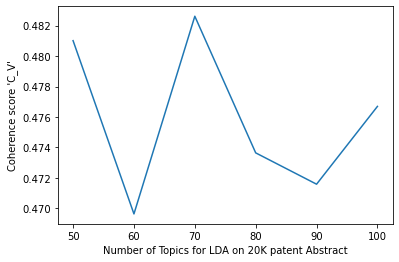

In [15]:
# Plot the coherence score for different number of topics
x, y = zip(*coherence_scores)  # unpack the list of tuples into two separate lists
plt.plot(x, y)
plt.xlabel("Number of Topics for LDA on 20K patent claim")
plt.ylabel("Coherence score 'C_V'")
plt.show()

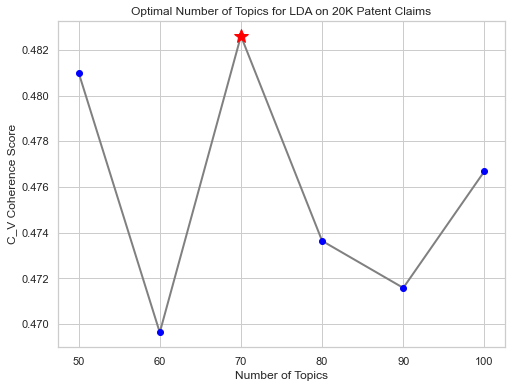

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

topics = [50, 60, 70, 80, 90, 100]
coherence_scores = [0.4810090477278116,0.4696367160833726,0.48261153251985583, 0.4736439284970115,0.47158767463241696, 0.4766936404776766]

# Find the index of the maximum score
max_index = np.argmax(coherence_scores)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
plt.plot(topics, coherence_scores, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray')

# Add red star for the highest point
plt.plot(topics[max_index], coherence_scores[max_index], marker='*', markersize=15, color='red')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for LDA on 20K Patent Claims')

# Show the plot
plt.show()


In [16]:
#num-topic=50-100 for 30k

In [17]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import matplotlib.pyplot as plt

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_30K['Lemmatized-Claim']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):  # iterate over the values 50, 60, 70, 80, 90, 100 in that order.
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)
    cm = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # fix the variable name here
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.45135061202910165
Number of Topics:  60  Coherence Score:  0.4715362938434643
Number of Topics:  70  Coherence Score:  0.4580295766875261
Number of Topics:  80  Coherence Score:  0.4577609040743372
Number of Topics:  90  Coherence Score:  0.4506738297085668
Number of Topics:  100  Coherence Score:  0.45996785765117815


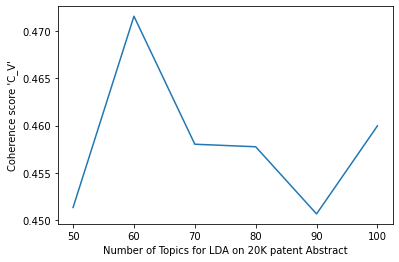

In [18]:
# Plot the coherence score for different number of topics
x, y = zip(*coherence_scores)  # unpack the list of tuples into two separate lists
plt.plot(x, y)
plt.xlabel("Number of Topics for LDA on 30K patent claim")
plt.ylabel("Coherence score 'C_V'")
plt.show()

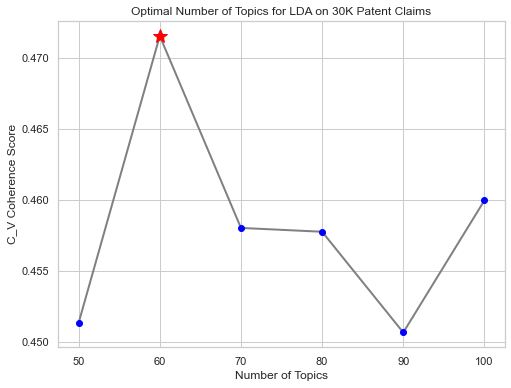

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

topics = [50, 60, 70, 80, 90, 100]
coherence_scores = [0.45135061202910165,0.4715362938434643,0.4580295766875261,0.4577609040743372,0.4506738297085668,0.45996785765117815]

# Find the index of the maximum score
max_index = np.argmax(coherence_scores)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
plt.plot(topics, coherence_scores, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray')

# Add red star for the highest point
plt.plot(topics[max_index], coherence_scores[max_index], marker='*', markersize=15, color='red')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for LDA on 30K Patent Claims')

# Show the plot
plt.show()

In [19]:
#num-topic=50-100 for 50k

In [20]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
import matplotlib.pyplot as plt

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_50K['Lemmatized-Claim']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):  # iterate over the values 50, 60, 70, 80, 90, 100 in that order.
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)
    cm = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()  # fix the variable name here
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.4946286709523778
Number of Topics:  60  Coherence Score:  0.46819111448647993
Number of Topics:  70  Coherence Score:  0.4605334924859806
Number of Topics:  80  Coherence Score:  0.45569639376621024
Number of Topics:  90  Coherence Score:  0.4473374219911234
Number of Topics:  100  Coherence Score:  0.45108042959999317


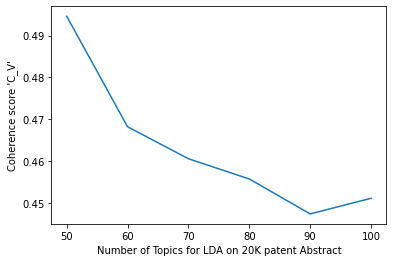

In [21]:
# Plot the coherence score for different number of topics
x, y = zip(*coherence_scores)  # unpack the list of tuples into two separate lists
plt.plot(x, y)
plt.xlabel("Number of Topics for LDA on 50K patent claim")
plt.ylabel("Coherence score 'C_V'")
plt.show()

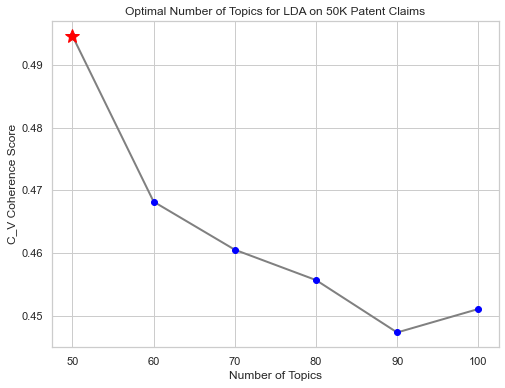

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

topics = [50, 60, 70, 80, 90, 100]
coherence_scores = [0.4946286709523778,0.46819111448647993,0.4605334924859806,0.45569639376621024,0.4473374219911234, 0.45108042959999317]

# Find the index of the maximum score
max_index = np.argmax(coherence_scores)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
plt.plot(topics, coherence_scores, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray')

# Add red star for the highest point
plt.plot(topics[max_index], coherence_scores[max_index], marker='*', markersize=15, color='red')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for LDA on 50K Patent Claims')

# Show the plot
plt.show()

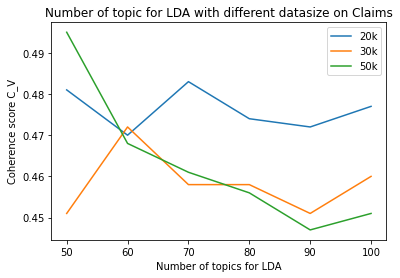

In [24]:
import matplotlib.pyplot as plt

# coherence scores for each dataset
k_20k = [(50, 0.481), (60, 0.470), (70, 0.483), (80, 0.474), (90, 0.472), (100, 0.477)]
k_30k = [(50, 0.451), (60, 0.472), (70, 0.458), (80, 0.458), (90, 0.451), (100, 0.460)]
k_50k = [(50, 0.495), (60, 0.468), (70, 0.461), (80, 0.456), (90, 0.447), (100, 0.451)]

# separate the x and y values for each dataset
x_20k, y_20k = zip(*k_20k)
x_30k, y_30k = zip(*k_30k)
x_50k, y_50k = zip(*k_50k)

# create the plot
plt.plot(x_20k, y_20k, label='20k')
plt.plot(x_30k, y_30k, label='30k')
plt.plot(x_50k, y_50k, label='50k')
plt.xlabel('Number of topics for LDA')
plt.ylabel('Coherence score C_V')
plt.title('Number of topic for LDA with different datasize on Claims')
plt.legend()
plt.show()

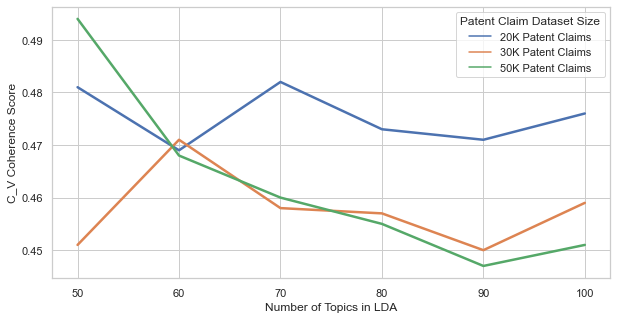

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create dataframe with coherence scores
data = {'Number of Topics': [50, 60, 70, 80, 90, 100],
        '20K Patent Claims': [0.481, 0.469, 0.482, 0.473, 0.471, 0.476],
        '30K Patent Claims': [0.451, 0.471, 0.458, 0.457, 0.450, 0.459],
        '50K Patent Claims': [0.494, 0.468, 0.460, 0.455, 0.447, 0.451]}
df = pd.DataFrame(data)

# set style and plot
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
ax = sns.lineplot(x='Number of Topics', y='value', hue='variable', 
                  data=pd.melt(df, ['Number of Topics']), 
                  linewidth=2.5, palette='deep')

# set labels and legend
ax.set_xlabel('Number of Topics in LDA')
ax.set_ylabel('C_V Coherence Score')
plt.legend(title='Patent Claim Dataset Size', loc='best')

# identify highest score
max_score = df.max().max()
x_pos = df.idxmax().values[0]
y_pos = max_score + 0.01
plt.annotate(f'Highest Score: {max_score:.3f}', xy=(x_pos, max_score), 
             xytext=(x_pos, y_pos), ha='center', va='center', 
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


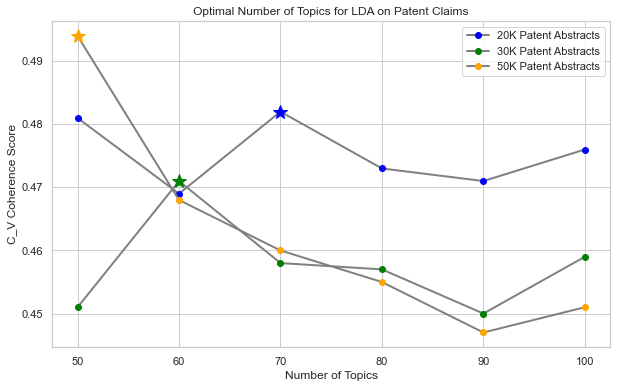

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data for 20K Patent claims
topics_20k = [50, 60, 70, 80, 90, 100]
coherence_scores_20k =  [0.481, 0.469, 0.482, 0.473, 0.471, 0.476]
max_index_20k = np.argmax(coherence_scores_20k)

# Data for 30K Patent claims
topics_30k = [50, 60, 70, 80, 90, 100]
coherence_scores_30k = [0.451, 0.471, 0.458, 0.457, 0.450, 0.459]
max_index_30k = np.argmax(coherence_scores_30k)

# Data for 50K Patent claims
topics_50k = [50, 60, 70, 80, 90, 100]
coherence_scores_50k = [0.494, 0.468, 0.460, 0.455, 0.447, 0.451]
max_index_50k = np.argmax(coherence_scores_50k)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot the data for 20K Patent claims
plt.plot(topics_20k, coherence_scores_20k, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray', label='20K Patent Abstracts')

# Add red star for the highest point
plt.plot(topics_20k[max_index_20k], coherence_scores_20k[max_index_20k], marker='*', markersize=15, color='blue')

# Plot the data for 30K Patent claims
plt.plot(topics_30k, coherence_scores_30k, marker='o', markerfacecolor='green', markeredgecolor='green', linewidth=2, color='gray', label='30K Patent Abstracts')

# Add red star for the highest point
plt.plot(topics_30k[max_index_30k], coherence_scores_30k[max_index_30k], marker='*', markersize=15, color='green')

# Plot the data for 50K Patent claims
plt.plot(topics_50k, coherence_scores_50k, marker='o', markerfacecolor='orange', markeredgecolor='orange', linewidth=2, color='gray', label='50K Patent Abstracts')

# Add red star for the highest point
plt.plot(topics_50k[max_index_50k], coherence_scores_50k[max_index_50k], marker='*', markersize=15, color='orange')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for LDA on Patent Claims')

# Add legend
plt.legend()

# Show the plot
plt.show()

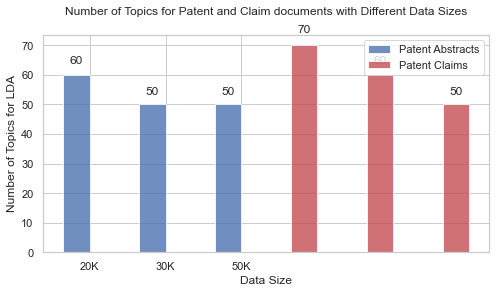

In [27]:
import matplotlib.pyplot as plt

# Data for abstracts
abstracts_data = {
'20K': (60, 0.46),
'30K': (50, 0.46),
'50K': (50, 0.47)
}

# Data for claims
claims_data = {
'20K': (70, 0.48),
'30K': (60, 0.47),
'50K': (50, 0.49)
}

# Extract data for plotting
sizes = list(abstracts_data.keys())
abstracts_topics = [v[0] for v in abstracts_data.values()]
claims_topics = [v[0] for v in claims_data.values()]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.35
opacity = 0.8

# Plot the bars for abstracts and claims
rects1 = ax.bar(sizes, abstracts_topics, bar_width,
                alpha=opacity, color='b',
                label='Patent Abstracts')

rects2 = ax.bar([str(x) + str(bar_width) for x in sizes], claims_topics, bar_width,
                alpha=opacity, color='r',
                label='Patent Claims')

# Add labels and title
ax.set_xlabel('Data Size')
ax.set_ylabel('Number of Topics for LDA')
ax.set_title('Number of Topics for Patent and Claim documents with Different Data Sizes', pad=20)
ax.set_xticks([x + bar_width / 2 for x in range(len(sizes))])
ax.set_xticklabels(sizes)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


# NMF

# num-topic=50-100 for 20k NMF-claim

In [25]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_20K['Lemmatized-Claim']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):
    nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)
    nmf_output = nmf_model[tfidf_corpus]
    cm = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.45129103915852053
Number of Topics:  60  Coherence Score:  0.43921231435661745
Number of Topics:  70  Coherence Score:  0.42152920089975554
Number of Topics:  80  Coherence Score:  0.4312157293081983
Number of Topics:  90  Coherence Score:  0.42599992137026954
Number of Topics:  100  Coherence Score:  0.40982320472664485


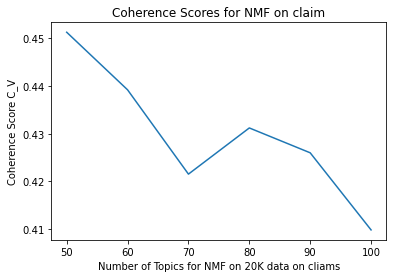

In [26]:
import matplotlib.pyplot as plt

# Plot the coherence scores
topic_nums = [t[0] for t in coherence_scores]
coherence_values = [t[1] for t in coherence_scores]
plt.plot(topic_nums, coherence_values)
plt.xlabel("Number of Topics for NMF on 20K data on cliams")
plt.ylabel("Coherence Score C_V")
plt.title("Coherence Scores for NMF on claim")
plt.show()

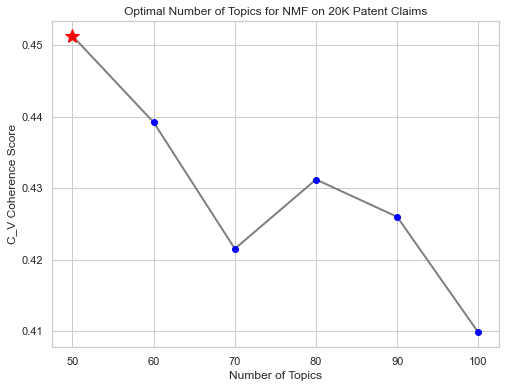

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

topics = [50, 60, 70, 80, 90, 100]
coherence_scores = [0.45129103915852053,0.43921231435661745,0.42152920089975554, 0.4312157293081983,0.42599992137026954,0.40982320472664485]

# Find the index of the maximum score
max_index = np.argmax(coherence_scores)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
plt.plot(topics, coherence_scores, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray')

# Add red star for the highest point
plt.plot(topics[max_index], coherence_scores[max_index], marker='*', markersize=15, color='red')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for NMF on 20K Patent Claims')

# Show the plot
plt.show()

# num-topic=50-100 for 30k NMF

In [27]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_30K['Lemmatized-Claim']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):
    nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)
    nmf_output = nmf_model[tfidf_corpus]
    cm = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.4480645565914278
Number of Topics:  60  Coherence Score:  0.4600950558320819
Number of Topics:  70  Coherence Score:  0.45202554535531453
Number of Topics:  80  Coherence Score:  0.4332338396527698
Number of Topics:  90  Coherence Score:  0.43741813733710644
Number of Topics:  100  Coherence Score:  0.4347254422886656


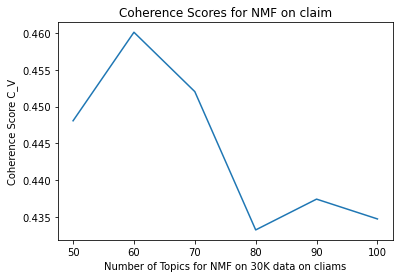

In [28]:
import matplotlib.pyplot as plt

# Plot the coherence scores
topic_nums = [t[0] for t in coherence_scores]
coherence_values = [t[1] for t in coherence_scores]
plt.plot(topic_nums, coherence_values)
plt.xlabel("Number of Topics for NMF on 30K data on cliams")
plt.ylabel("Coherence Score C_V")
plt.title("Coherence Scores for NMF on claim")
plt.show()

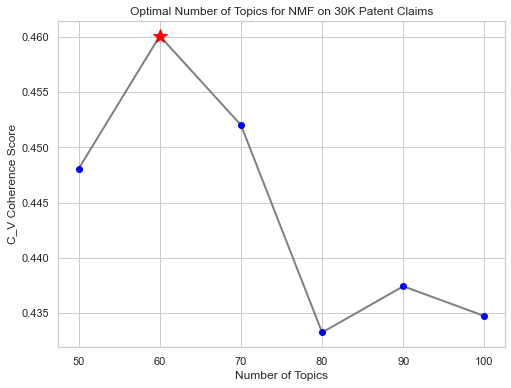

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

topics = [50, 60, 70, 80, 90, 100]
coherence_scores = [0.4480645565914278,0.4600950558320819,0.45202554535531453,0.4332338396527698,0.43741813733710644,0.4347254422886656 ]

# Find the index of the maximum score
max_index = np.argmax(coherence_scores)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
plt.plot(topics, coherence_scores, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray')

# Add red star for the highest point
plt.plot(topics[max_index], coherence_scores[max_index], marker='*', markersize=15, color='red')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for NMF on 30K Patent Claims')

# Show the plot
plt.show()

# num-topic=50-100 for 50k NMF-claim

In [29]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_50K['Lemmatized-Claim']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Try different numbers of topics and calculate the coherence score for each
coherence_scores = []
for num_topics in range(50, 101, 10):
    nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)
    nmf_output = nmf_model[tfidf_corpus]
    cm = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append((num_topics, coherence))
    print("Number of Topics: ", num_topics, " Coherence Score: ", coherence)

Number of Topics:  50  Coherence Score:  0.5036220762238817
Number of Topics:  60  Coherence Score:  0.5067258751253925
Number of Topics:  70  Coherence Score:  0.4756015556986651
Number of Topics:  80  Coherence Score:  0.4717243022866072
Number of Topics:  90  Coherence Score:  0.48601433685905904
Number of Topics:  100  Coherence Score:  0.4599263394402642


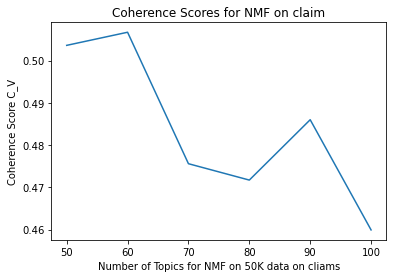

In [30]:
import matplotlib.pyplot as plt

# Plot the coherence scores
topic_nums = [t[0] for t in coherence_scores]
coherence_values = [t[1] for t in coherence_scores]
plt.plot(topic_nums, coherence_values)
plt.xlabel("Number of Topics for NMF on 50K data on cliams")
plt.ylabel("Coherence Score C_V")
plt.title("Coherence Scores for NMF on claim")
plt.show()

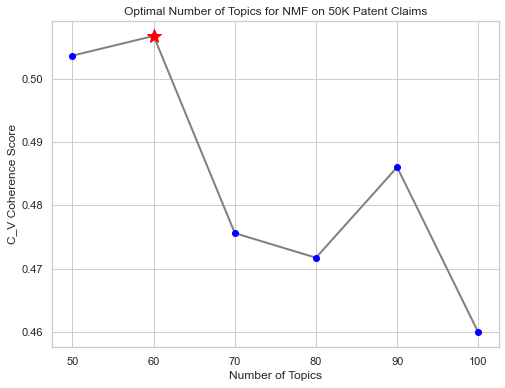

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

topics = [50, 60, 70, 80, 90, 100]
coherence_scores = [0.5036220762238817,0.5067258751253925,0.4756015556986651,0.4717243022866072,0.48601433685905904,0.4599263394402642]

# Find the index of the maximum score
max_index = np.argmax(coherence_scores)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
plt.plot(topics, coherence_scores, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray')

# Add red star for the highest point
plt.plot(topics[max_index], coherence_scores[max_index], marker='*', markersize=15, color='red')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for NMF on 50K Patent Claims')

# Show the plot
plt.show()

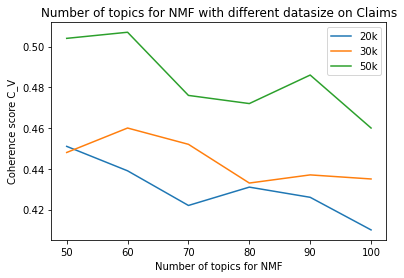

In [31]:
import matplotlib.pyplot as plt

# coherence scores for each dataset
k_20k = [(50, 0.451), (60, 0.439), (70, 0.422), (80, 0.431), (90, 0.426), (100, 0.410)]
k_30k = [(50, 0.448), (60, 0.460), (70, 0.452), (80, 0.433), (90, 0.437), (100, 0.435)]
k_50k = [(50, 0.504), (60, 0.507), (70, 0.476), (80, 0.472), (90, 0.486), (100, 0.460)]

# separate the x and y values for each dataset
x_20k, y_20k = zip(*k_20k)
x_30k, y_30k = zip(*k_30k)
x_50k, y_50k = zip(*k_50k)

# create the plot
plt.plot(x_20k, y_20k, label='20k')
plt.plot(x_30k, y_30k, label='30k')
plt.plot(x_50k, y_50k, label='50k')
plt.xlabel('Number of topics for NMF')
plt.ylabel('Coherence score C_V')
plt.title('Number of topics for NMF with different datasize on Claims')
plt.legend()
plt.show()


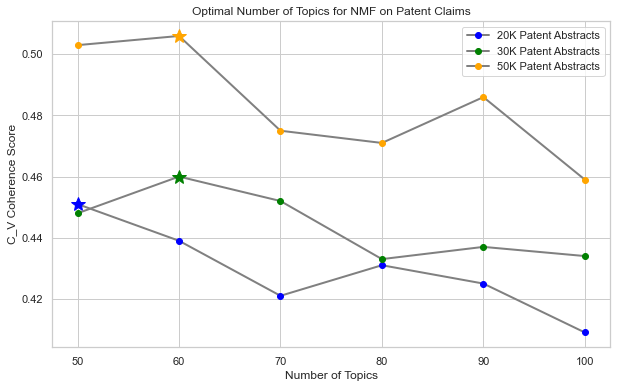

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data for 20K Patent claims
topics_20k = [50, 60, 70, 80, 90, 100]
coherence_scores_20k =  [0.451, 0.439, 0.421, 0.431, 0.425, 0.409]
max_index_20k = np.argmax(coherence_scores_20k)

# Data for 30K Patent claims
topics_30k = [50, 60, 70, 80, 90, 100]
coherence_scores_30k = [0.448, 0.46, 0.452, 0.433, 0.437, 0.434]
max_index_30k = np.argmax(coherence_scores_30k)

# Data for 50K Patent claims
topics_50k = [50, 60, 70, 80, 90, 100]
coherence_scores_50k = [0.503, 0.506, 0.475, 0.471, 0.486, 0.459]
max_index_50k = np.argmax(coherence_scores_50k)

# Create the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot the data for 20K Patent claims
plt.plot(topics_20k, coherence_scores_20k, marker='o', markerfacecolor='blue', markeredgecolor='blue', linewidth=2, color='gray', label='20K Patent Abstracts')

# Add red star for the highest point
plt.plot(topics_20k[max_index_20k], coherence_scores_20k[max_index_20k], marker='*', markersize=15, color='blue')

# Plot the data for 30K Patent claims
plt.plot(topics_30k, coherence_scores_30k, marker='o', markerfacecolor='green', markeredgecolor='green', linewidth=2, color='gray', label='30K Patent Abstracts')

# Add red star for the highest point
plt.plot(topics_30k[max_index_30k], coherence_scores_30k[max_index_30k], marker='*', markersize=15, color='green')

# Plot the data for 50K Patent claims
plt.plot(topics_50k, coherence_scores_50k, marker='o', markerfacecolor='orange', markeredgecolor='orange', linewidth=2, color='gray', label='50K Patent Abstracts')

# Add red star for the highest point
plt.plot(topics_50k[max_index_50k], coherence_scores_50k[max_index_50k], marker='*', markersize=15, color='orange')

# Add labels and title
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence Score')
plt.title('Optimal Number of Topics for NMF on Patent Claims')

# Add legend
plt.legend()

# Show the plot
plt.show()

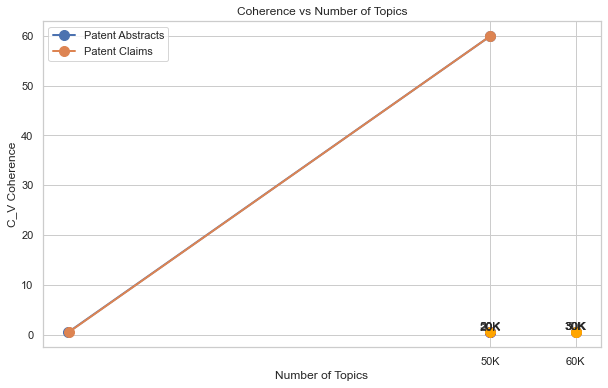

In [14]:
import matplotlib.pyplot as plt

# Data for abstracts
abstracts_data = {
    '20K': (50, 0.42),
    '30K': (60, 0.48),
    '50K': (50, 0.50)
}

# Data for claims
claims_data = {
    '20K': (50, 0.45),
    '30K': (60, 0.46),
    '50K': (60, 0.50)
}

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(list(abstracts_data.values())[0], list(abstracts_data.values())[1], marker='o', markersize=10, linewidth=2, label='Patent Abstracts')
plt.plot(list(claims_data.values())[0], list(claims_data.values())[1], marker='o', markersize=10, linewidth=2, label='Patent Claims')
for k, v in abstracts_data.items():
    plt.plot(v[0], v[1], marker='o', markersize=10, color='blue')
    plt.text(v[0], v[1], k, fontsize=12, verticalalignment='bottom', horizontalalignment='center')
for k, v in claims_data.items():
    plt.plot(v[0], v[1], marker='o', markersize=10, color='orange')
    plt.text(v[0], v[1], k, fontsize=12, verticalalignment='bottom', horizontalalignment='center')
    
plt.title('Coherence vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('C_V Coherence')
plt.xticks([50, 60])
plt.gca().set_xticklabels(['50K', '60K'])
plt.legend()
plt.show()

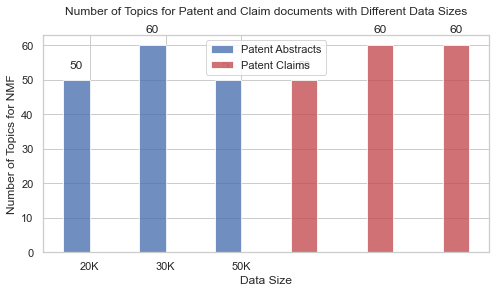

In [25]:
import matplotlib.pyplot as plt

# Data for abstracts
abstracts_data = {
    '20K': (50, 0.42),
    '30K': (60, 0.48),
    '50K': (50, 0.50)
}

# Data for claims
claims_data = {
    '20K': (50, 0.45),
    '30K': (60, 0.46),
    '50K': (60, 0.50)
}

# Extract data for plotting
sizes = list(abstracts_data.keys())
abstracts_topics = [v[0] for v in abstracts_data.values()]
claims_topics = [v[0] for v in claims_data.values()]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.35
opacity = 0.8

# Plot the bars for abstracts and claims
rects1 = ax.bar(sizes, abstracts_topics, bar_width,
                alpha=opacity, color='b',
                label='Patent Abstracts')

rects2 = ax.bar([str(x) + str(bar_width) for x in sizes], claims_topics, bar_width,
                alpha=opacity, color='r',
                label='Patent Claims')

# Add labels and title
ax.set_xlabel('Data Size')
ax.set_ylabel('Number of Topics for NMF')
ax.set_title('Number of Topics for Patent and Claim documents with Different Data Sizes', pad=20)
ax.set_xticks([x + bar_width / 2 for x in range(len(sizes))])
ax.set_xticklabels(sizes)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
